PCA Comparison among Shogun, Scikit-learn and Matplotlib 
---------------------

Following is the comparison of Principal Component Analysis implemented in Shogun with naive implementation and other toolboxes like sklearn and matplotlib. Two datasets are used for comparison, one is randomly generated and other is standard Iris dataset.  

In [33]:
import numpy as np
import time
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

In [34]:
# Adding random seed for consistency 
np.random.seed(1)

### Randomly Generated 3D Dataset

In [35]:
# Creating dataset of dimension 3 x 40 consisting of two classes
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

<IPython.core.display.Javascript object>


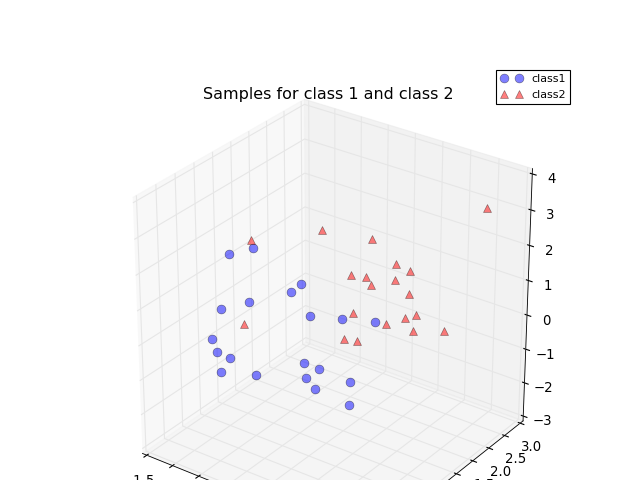

In [37]:
# Plotting dataset
fig1 = plt.figure(1)
fig1.set_size_inches(8, 8)
ax1 = fig1.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax1.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax1.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')
plt.title('Samples for class 1 and class 2')
ax1.legend(loc='upper right')
plt.show()
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)

** Naive Python Implementation **

In [38]:
start = time.time()
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
eig_pairs.sort()
eig_pairs.reverse()
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
transformed = matrix_w.T.dot(all_samples)
end = time.time()
print 'Naive Python implementation time:'
print end - start

Naive Python implementation time:
0.00357794761658


<IPython.core.display.Javascript object>


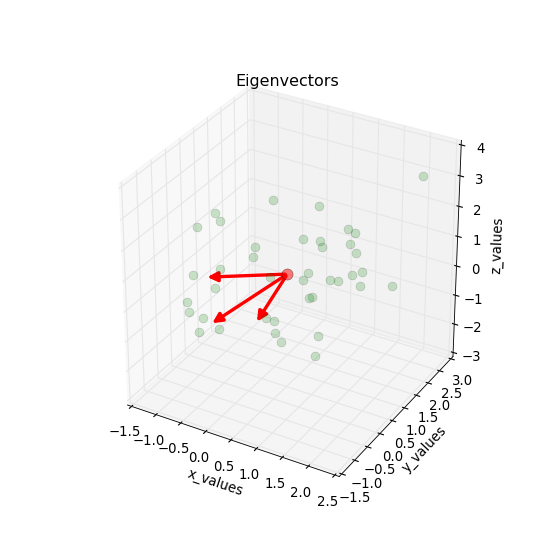

In [39]:
# Plotting eigen vectors
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])
class Arrow3D(FancyArrowPatch):
	def __init__(self, xs, ys, zs, *args, **kwargs):
		FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
		self._verts3d = xs, ys, zs
	def draw(self, renderer):
		xs3d, ys3d, zs3d = self._verts3d
		xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
		self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
		FancyArrowPatch.draw(self, renderer)	
fig2 = plt.figure(figsize=(7,7))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax2.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_cov.T:
	a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
	ax2.add_artist(a)
ax2.set_xlabel('x_values')
ax2.set_ylabel('y_values')
ax2.set_zlabel('z_values')
plt.title('Eigenvectors')
plt.show()

<IPython.core.display.Javascript object>


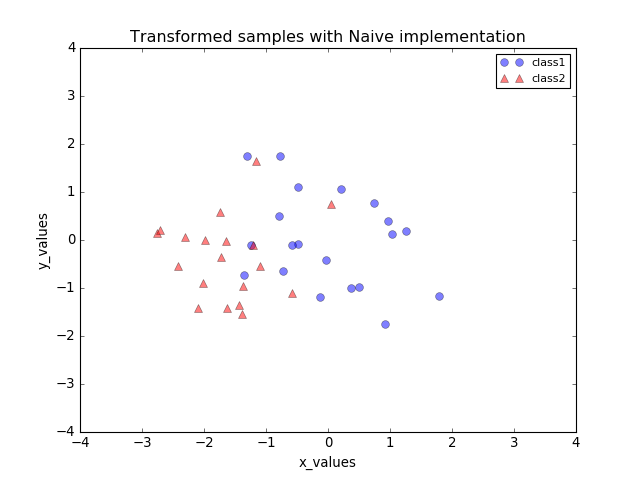

In [40]:
# Plotting datapoints in transformed space
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with Naive implementation')
plt.show()

** Shogun ** 

In [41]:
from modshogun import * 
start = time.time()
train_features = RealFeatures(all_samples.T)
preprocessor = PCA(EVD)
preprocessor.set_target_dim(2)
preprocessor.init(train_features)
E = preprocessor.get_transformation_matrix()
transformed = E.T
end = time.time()
print 'Shogun Time:'
print end - start

Shogun Time:
0.00367903709412


<IPython.core.display.Javascript object>


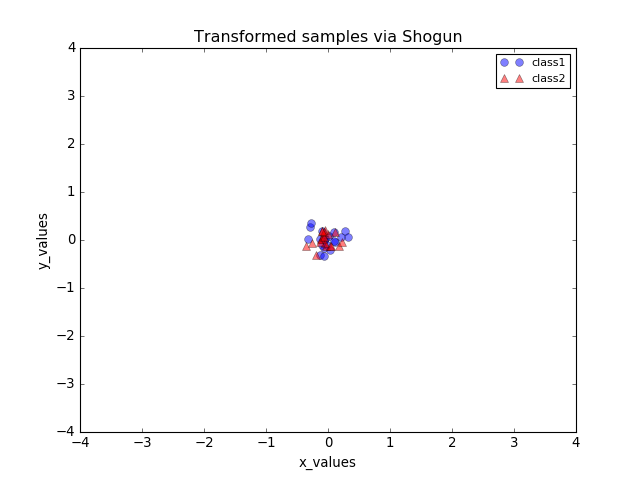

In [42]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples via Shogun')
plt.show()

** Scikit-learn **

In [43]:
from sklearn.decomposition import PCA as sklearnPCA
start = time.time()
sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)
end = time.time()
print 'scikit-learn time:'
print end - start

scikit-learn time:
0.00130009651184


<IPython.core.display.Javascript object>


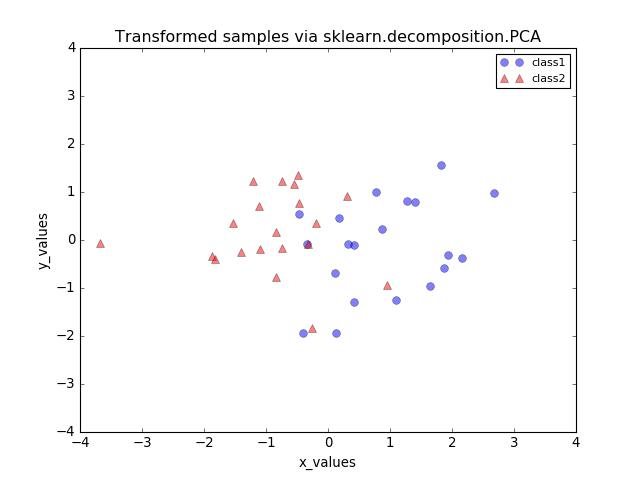

In [44]:
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

** Matplotlib ** 

In [45]:
from matplotlib.mlab import PCA as mlabPCA
start = time.time()
mlab_pca = mlabPCA(all_samples.T)
end = time.time()
print 'matplotlib time:'
print end - start

matplotlib time:
0.00325608253479


<IPython.core.display.Javascript object>


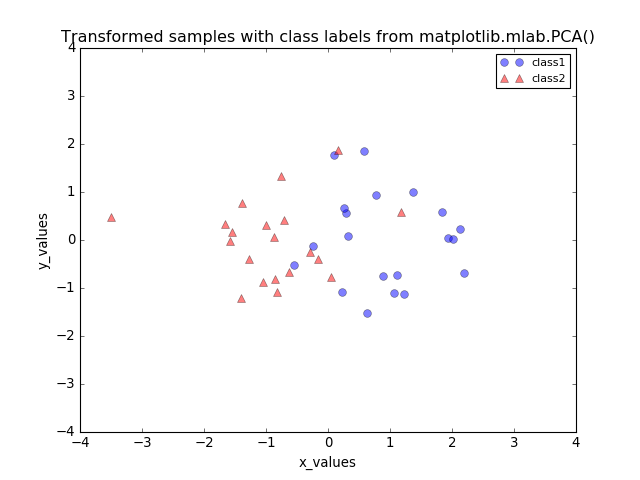

In [46]:
plt.plot(mlab_pca.Y[0:20,0],mlab_pca.Y[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[20:40,0], mlab_pca.Y[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')
plt.show()

### Iris Dataset 
<a href="https://archive.ics.uci.edu/ml/datasets/Iris">Iris dataset</a> from UCI machine learning repository. 

_Reference: Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science._

** Data Set Information: ** 

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. Following are the three classes in dataset: 
* Iris-setosa 
* Iris-versicolor
* Iris-virginica

Four features: 
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

In [47]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

In [48]:
# 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True)
X = df[[0,1,2,3]].values
X = X.T
y = df['class label'].values
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}

** Naive Implementation ** 

In [49]:
start = time.time()
cov_mat = np.cov([X[0,:],X[1,:],X[2,:]], X[3,:])
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
eig_pairs.sort()
eig_pairs.reverse()
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
X_pca = matrix_w.T.dot(X)
X_pca = X_pca.T
end = time.time()
print 'Naive Python implementation time:'
print end - start
print X_pca.shape

Naive Python implementation time:
0.000825166702271
(150, 2)


In [50]:
def plot_pca():
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):
        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: Iris projection onto the first 2 principal components')
    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")
    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    
    plt.tight_layout
    plt.grid()
    plt.show()

<IPython.core.display.Javascript object>


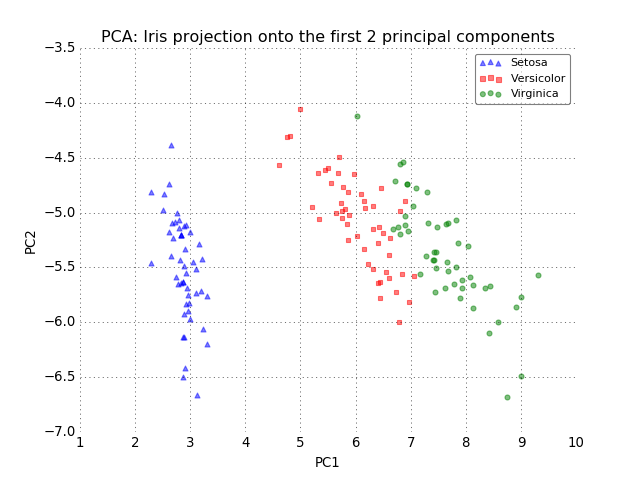

In [51]:
plot_pca()

** Shogun ** 

In [52]:
start = time.time()
train_features = RealFeatures(X.T)
preprocessor = PCA(EVD)
preprocessor.set_target_dim(2)
preprocessor.init(train_features)
E = preprocessor.get_transformation_matrix()
X_pca = E.T
X_pca = X_pca.T
end = time.time()
print 'Shogun Time:'
print end - start
print X_pca.shape

Shogun Time:
0.0168571472168
(150, 2)


<IPython.core.display.Javascript object>


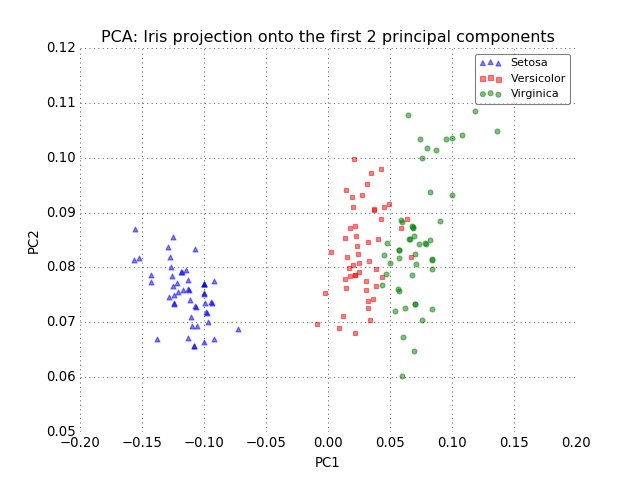

In [53]:
plot_pca()

** Scikit-learn ** 

In [54]:
from sklearn.decomposition import PCA as sklearnPCA
start = time.time()
sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X.T)
end = time.time()
print 'Scikit-learn implementation time:'
print end - start
print X_pca.shape

Scikit-learn implementation time:
0.00240278244019
(150, 2)


<IPython.core.display.Javascript object>


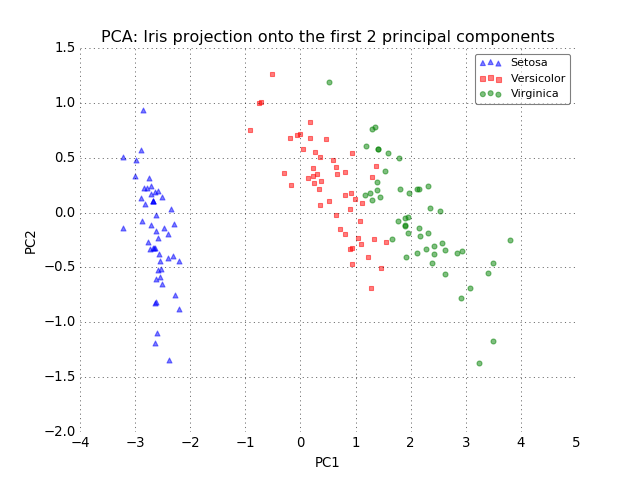

In [55]:
plot_pca()

** Matplotlib ** 

In [56]:
start = time.time()
X_pca = mlabPCA(X.T)
end = time.time()
print 'matplotlib time:'
print end - start

matplotlib time:
0.000730037689209


<IPython.core.display.Javascript object>


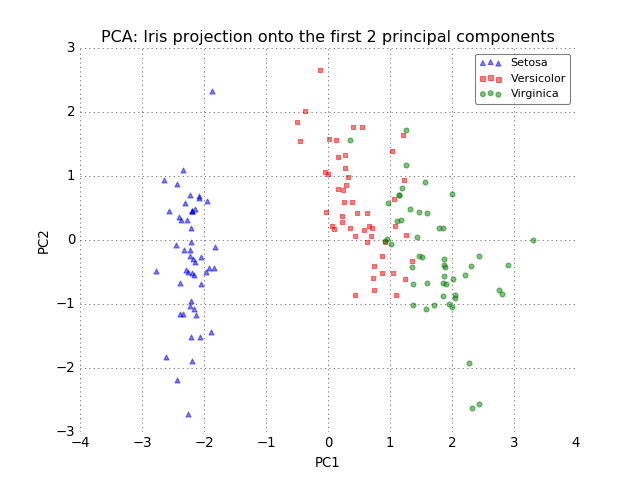

In [58]:
# Plotting principal components from matlplotlib
ax = plt.subplot(111)
for label,marker,color in zip(
    range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):
    plt.scatter(x=X_pca.Y[:,0][y == label],
            y=X_pca.Y[:,1][y == label],
            marker=marker,
            color=color,
            alpha=0.5,
            label=label_dict[label]
            )
plt.xlabel('PC1')
plt.ylabel('PC2')
leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.title('PCA: Iris projection onto the first 2 principal components')
# hide axis ticks
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
        labelbottom="on", left="off", right="off", labelleft="on")
# remove axis spines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)    
plt.tight_layout
plt.grid()
plt.show()